In [46]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from scipy.stats import linregress

In [47]:
#Read in layoff csv data and show
layoff_DF = pd.read_csv("Resources/layoffs_data.csv")
citiesUS_DF = pd.read_csv("Resources/cities_us.csv")
layoff_DF

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Thoughtworks,Chicago,Other,500.0,0.04,3/1/2023 0:00,https://techcrunch.com/2023/03/01/thoughtworks...,748.0,Post-IPO,3/2/2023 4:06,United States,Unknown
1,iFood,Sao Paulo,Food,355.0,0.06,3/1/2023 0:00,https://economia.uol.com.br/noticias/redacao/2...,2100.0,Subsidiary,3/2/2023 4:13,Brazil,Unknown
2,Waymo,SF Bay Area,Transportation,209.0,0.08,3/1/2023 0:00,https://www.theinformation.com/articles/alphab...,5500.0,Subsidiary,3/2/2023 4:08,United States,Unknown
3,PayFit,Paris,HR,200.0,0.20,3/1/2023 0:00,https://www.lesechos.fr/start-up/next40-vivate...,495.0,Series E,3/2/2023 4:17,France,Unknown
4,Yellow.ai,SF Bay Area,Support,200.0,NaN,3/1/2023 0:00,https://inc42.com/buzz/conversational-ai-start...,102.0,Series C,3/2/2023 4:12,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020 0:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,4/3/2020 4:47,United States,Unknown
2326,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020 0:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,4/17/2020 0:12,United States,Unknown
2327,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020 0:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,3/31/2020 16:04,United States,Unknown
2328,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020 0:00,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,3/31/2020 13:21,United States,Unknown


In [48]:
#Clean data to only focus on Countries headquartered in the United States
US_layoff_DF = layoff_DF.loc[layoff_DF["Country"]=="United States"]

#Show the data
US_layoff_DF

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Thoughtworks,Chicago,Other,500.0,0.04,3/1/2023 0:00,https://techcrunch.com/2023/03/01/thoughtworks...,748.0,Post-IPO,3/2/2023 4:06,United States,Unknown
2,Waymo,SF Bay Area,Transportation,209.0,0.08,3/1/2023 0:00,https://www.theinformation.com/articles/alphab...,5500.0,Subsidiary,3/2/2023 4:08,United States,Unknown
4,Yellow.ai,SF Bay Area,Support,200.0,NaN,3/1/2023 0:00,https://inc42.com/buzz/conversational-ai-start...,102.0,Series C,3/2/2023 4:12,United States,Unknown
5,Sonder,SF Bay Area,Travel,100.0,0.14,3/1/2023 0:00,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,839.0,Post-IPO,3/2/2023 4:16,United States,Unknown
6,Electronic Arts,Baton Rouge,Consumer,200.0,NaN,2/28/2023 0:00,https://kotaku.com/ea-apex-legends-bugs-layoff...,2.0,Post-IPO,3/2/2023 4:10,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020 0:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,4/3/2020 4:47,United States,Unknown
2326,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020 0:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,4/17/2020 0:12,United States,Unknown
2327,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020 0:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,3/31/2020 16:04,United States,Unknown
2328,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020 0:00,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,3/31/2020 13:21,United States,Unknown


In [49]:
#adjust city names to make sure they are found when merging with cities_us dataset
replaceData = US_layoff_DF.replace("SF Bay Area" , "San Francisco")
replaceData = replaceData.replace("Washington D.C.","Washington")
replaceData = replaceData.replace("New York City","New York")
renameCity = citiesUS_DF.rename(columns = {"city_ascii": "Location_HQ"})

In [50]:
# filter the cities file to prevent duplicated for the same city in different states when merging
renameCity = renameCity.loc[renameCity["ranking"] == 1.0]
renameCity.head()

,city,Location_HQ,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [51]:
#merge the 2 datasets on the "Location_HQ" column
mergedData = pd.merge(replaceData,renameCity,how="left", on=["Location_HQ"])
mergedData

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Thoughtworks,Chicago,Other,500.0,0.04,3/1/2023 0:00,https://techcrunch.com/2023/03/01/thoughtworks...,748.0,Post-IPO,3/2/2023 4:06,...,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1.0,60018 60649 60641 60640 60643 60642 60645 6064...,1.840000e+09
1,Waymo,San Francisco,Transportation,209.0,0.08,3/1/2023 0:00,https://www.theinformation.com/articles/alphab...,5500.0,Subsidiary,3/2/2023 4:08,...,-122.4430,3592294.0,7256.0,polygon,False,True,America/Los_Angeles,1.0,94130 94131 94132 94133 94134 94109 94108 9410...,1.840022e+09
2,Yellow.ai,San Francisco,Support,200.0,NaN,3/1/2023 0:00,https://inc42.com/buzz/conversational-ai-start...,102.0,Series C,3/2/2023 4:12,...,-122.4430,3592294.0,7256.0,polygon,False,True,America/Los_Angeles,1.0,94130 94131 94132 94133 94134 94109 94108 9410...,1.840022e+09
3,Sonder,San Francisco,Travel,100.0,0.14,3/1/2023 0:00,https://www.sec.gov/ix?doc=/Archives/edgar/dat...,839.0,Post-IPO,3/2/2023 4:16,...,-122.4430,3592294.0,7256.0,polygon,False,True,America/Los_Angeles,1.0,94130 94131 94132 94133 94134 94109 94108 9410...,1.840022e+09
4,Electronic Arts,Baton Rouge,Consumer,200.0,NaN,2/28/2023 0:00,https://kotaku.com/ea-apex-legends-bugs-layoff...,2.0,Post-IPO,3/2/2023 4:10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020 0:00,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,4/3/2020 4:47,...,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1.0,90291 90293 90292 91316 91311 90037 90031 9000...,1.840020e+09
1523,Panda Squad,San Francisco,Consumer,6.0,0.75,3/13/2020 0:00,https://twitter.com/danielsinger/status/123854...,1.0,Seed,4/17/2020 0:12,...,-122.4430,3592294.0,7256.0,polygon,False,True,America/Los_Angeles,1.0,94130 94131 94132 94133 94134 94109 94108 9410...,1.840022e+09
1524,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020 0:00,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,3/31/2020 16:04,...,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1.0,90291 90293 90292 91316 91311 90037 90031 9000...,1.840020e+09
1525,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020 0:00,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,3/31/2020 13:21,...,-111.9306,1098526.0,699.0,polygon,False,True,America/Denver,1.0,84116 84115 84113 84112 84111 84144 84128 8418...,1.840021e+09


In [52]:
#drop columns that are not relevant
updated_mergedData= mergedData.drop(columns=['Percentage',"Source","Date_Added","List_of_Employees_Laid_Off","city","county_fips", "county_name","source","military","incorporated","timezone","zips","id","population", "density","ranking"])
updated_mergedData

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,state_id,state_name,lat,lng
0,Thoughtworks,Chicago,Other,500.0,3/1/2023 0:00,748.0,Post-IPO,United States,IL,Illinois,41.8373,-87.6862
1,Waymo,San Francisco,Transportation,209.0,3/1/2023 0:00,5500.0,Subsidiary,United States,CA,California,37.7562,-122.4430
2,Yellow.ai,San Francisco,Support,200.0,3/1/2023 0:00,102.0,Series C,United States,CA,California,37.7562,-122.4430
3,Sonder,San Francisco,Travel,100.0,3/1/2023 0:00,839.0,Post-IPO,United States,CA,California,37.7562,-122.4430
4,Electronic Arts,Baton Rouge,Consumer,200.0,2/28/2023 0:00,2.0,Post-IPO,United States,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1522,HopSkipDrive,Los Angeles,Transportation,8.0,3/13/2020 0:00,45.0,Unknown,United States,CA,California,34.1139,-118.4068
1523,Panda Squad,San Francisco,Consumer,6.0,3/13/2020 0:00,1.0,Seed,United States,CA,California,37.7562,-122.4430
1524,Tamara Mellon,Los Angeles,Retail,20.0,3/12/2020 0:00,90.0,Series C,United States,CA,California,34.1139,-118.4068
1525,EasyPost,Salt Lake City,Logistics,75.0,3/11/2020 0:00,12.0,Series A,United States,UT,Utah,40.7777,-111.9306


In [53]:
#drop na to exclude rows without complete information
cleaned_mergedData = updated_mergedData.dropna()
cleaned_mergedData.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,state_id,state_name,lat,lng
0,Thoughtworks,Chicago,Other,500.0,3/1/2023 0:00,748.0,Post-IPO,United States,IL,Illinois,41.8373,-87.6862
1,Waymo,San Francisco,Transportation,209.0,3/1/2023 0:00,5500.0,Subsidiary,United States,CA,California,37.7562,-122.4430
2,Yellow.ai,San Francisco,Support,200.0,3/1/2023 0:00,102.0,Series C,United States,CA,California,37.7562,-122.4430
3,Sonder,San Francisco,Travel,100.0,3/1/2023 0:00,839.0,Post-IPO,United States,CA,California,37.7562,-122.4430
5,Eventbrite,San Francisco,Consumer,80.0,2/28/2023 0:00,557.0,Post-IPO,United States,CA,California,37.7562,-122.4430


In [54]:
#check for duplicates - no duplicates found
duplicates = cleaned_mergedData[cleaned_mergedData[["Company","Laid_Off_Count","Date"]].duplicated() == True]
duplicates

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,state_id,state_name,lat,lng


In [55]:
#reset index
cleaned_mergedData = cleaned_mergedData.reset_index(drop=True)
cleaned_mergedData

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,state_id,state_name,lat,lng
0,Thoughtworks,Chicago,Other,500.0,3/1/2023 0:00,748.0,Post-IPO,United States,IL,Illinois,41.8373,-87.6862
1,Waymo,San Francisco,Transportation,209.0,3/1/2023 0:00,5500.0,Subsidiary,United States,CA,California,37.7562,-122.4430
2,Yellow.ai,San Francisco,Support,200.0,3/1/2023 0:00,102.0,Series C,United States,CA,California,37.7562,-122.4430
3,Sonder,San Francisco,Travel,100.0,3/1/2023 0:00,839.0,Post-IPO,United States,CA,California,37.7562,-122.4430
4,Eventbrite,San Francisco,Consumer,80.0,2/28/2023 0:00,557.0,Post-IPO,United States,CA,California,37.7562,-122.4430
...,...,...,...,...,...,...,...,...,...,...,...,...
885,Help.com,Austin,Support,16.0,3/16/2020 0:00,6.0,Seed,United States,TX,Texas,30.3004,-97.7522
886,HopSkipDrive,Los Angeles,Transportation,8.0,3/13/2020 0:00,45.0,Unknown,United States,CA,California,34.1139,-118.4068
887,Panda Squad,San Francisco,Consumer,6.0,3/13/2020 0:00,1.0,Seed,United States,CA,California,37.7562,-122.4430
888,Tamara Mellon,Los Angeles,Retail,20.0,3/12/2020 0:00,90.0,Series C,United States,CA,California,34.1139,-118.4068


## Question 1: Which industries have the most layoffs for the years 2022 and 2023?
#### Team Members: Ratima Chowadee, Lorena Egea

In [56]:
# companies count
companies_count = len(cleaned_mergedData["Company"].unique())
companies_count

722

In [57]:
US_layoffNew = cleaned_mergedData.copy()

# split Date column to get Year
split_date = [row.split('/') for row in US_layoffNew['Date']]
split_date = pd.DataFrame(split_date)
split_date = [row.split(' ') for row in split_date[2]]
split_date = pd.DataFrame(split_date)
split_date[0]
US_layoffNew['Year'] = split_date[0]
US_layoffNew

US_layoffNew = US_layoffNew[['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'state_id', 'state_name', 'Year']]
US_layoffNew

,Company,Location_HQ,Industry,Laid_Off_Count,state_id,state_name,Year
0,Thoughtworks,Chicago,Other,500.0,IL,Illinois,2023
1,Waymo,San Francisco,Transportation,209.0,CA,California,2023
2,Yellow.ai,San Francisco,Support,200.0,CA,California,2023
3,Sonder,San Francisco,Travel,100.0,CA,California,2023
4,Eventbrite,San Francisco,Consumer,80.0,CA,California,2023
...,...,...,...,...,...,...,...
885,Help.com,Austin,Support,16.0,TX,Texas,2020
886,HopSkipDrive,Los Angeles,Transportation,8.0,CA,California,2020
887,Panda Squad,San Francisco,Consumer,6.0,CA,California,2020
888,Tamara Mellon,Los Angeles,Retail,20.0,CA,California,2020


In [58]:
count_by_industry = US_layoffNew.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)
count_by_industry

Industry
Consumer          37750.0
Retail            32929.0
Transportation    20082.0
Other             18158.0
Finance           14207.0
Real Estate       13936.0
Sales             12856.0
Food              12144.0
Healthcare        11624.0
Travel             5994.0
Fitness            5576.0
Infrastructure     5453.0
Marketing          5075.0
Crypto             4605.0
Security           4149.0
Construction       3330.0
Data               3028.0
Recruiting         2453.0
Logistics          2270.0
Support            2153.0
Media              2061.0
Education          1812.0
HR                 1623.0
Product             825.0
Hardware            795.0
Legal               761.0
Energy              667.0
Aerospace           210.0
Manufacturing        20.0
Name: Laid_Off_Count, dtype: float64

      Laid_Off_Count
Year                
2020         47547.0
2021          9457.0
2022        100217.0
2023         69325.0


<AxesSubplot:ylabel='Laid_Off_Count'>

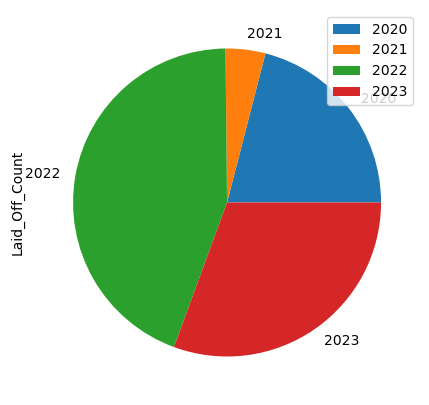

In [59]:
layoffs_by_year = US_layoffNew.groupby('Year').sum()['Laid_Off_Count']
layoffs_by_year = pd.DataFrame(layoffs_by_year)

print(layoffs_by_year)

layoffs_by_year.plot.pie(y= 'Laid_Off_Count', figsize=(5, 5), )


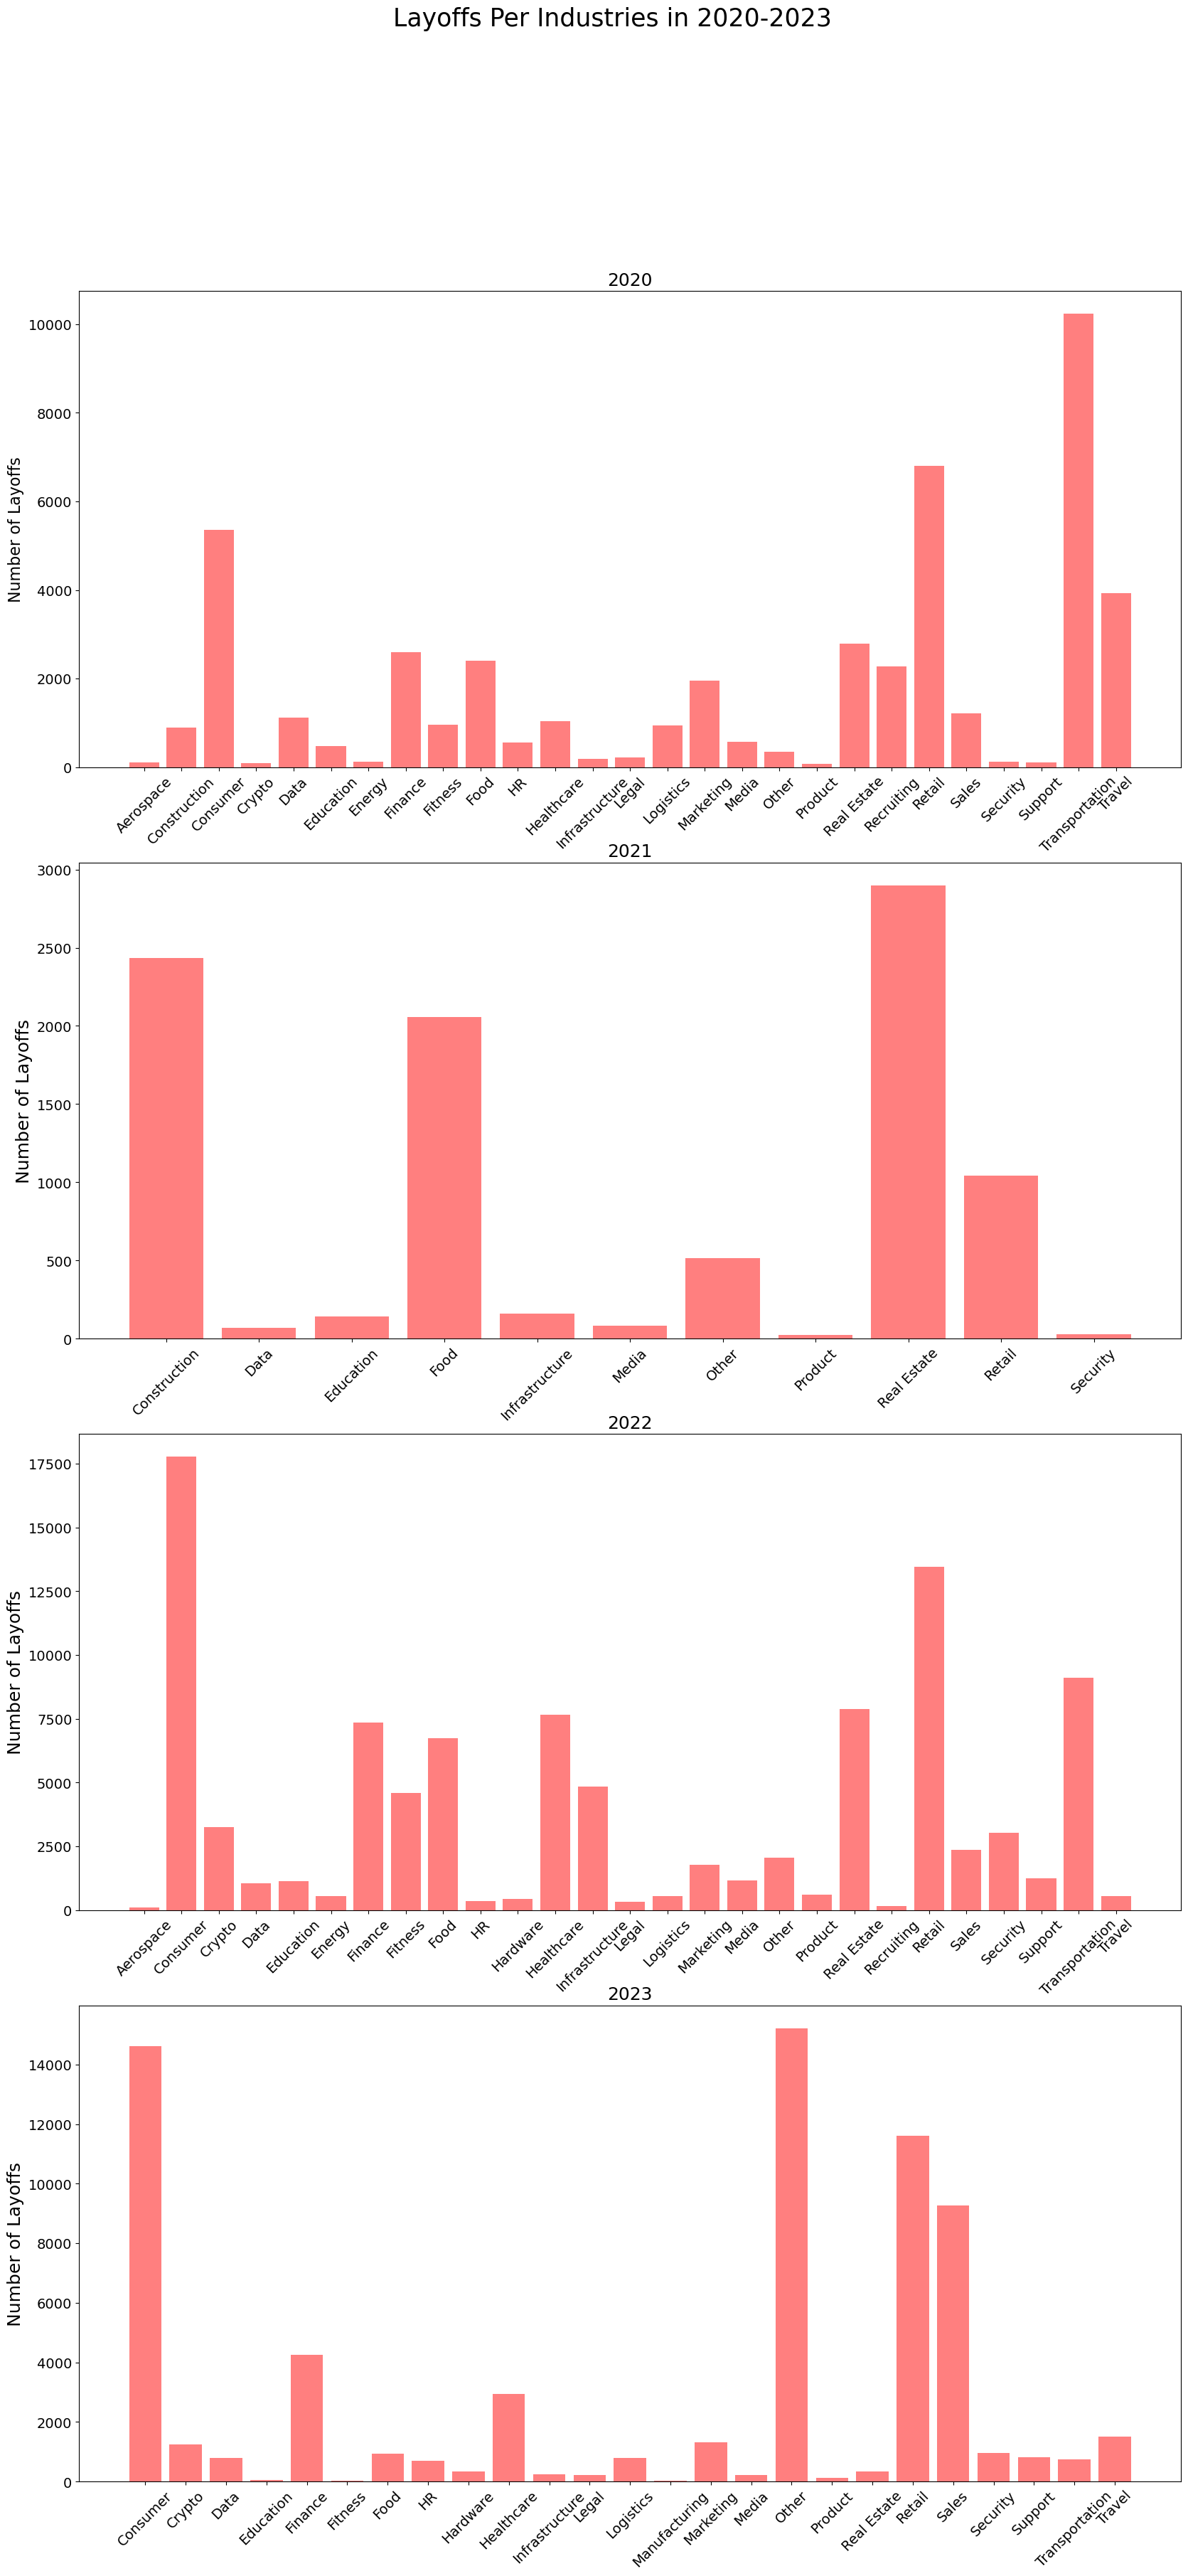

In [60]:
# find total laid off for 2020 by industry
data2020df = US_layoffNew.loc[US_layoffNew['Year'] == '2020']
total_2020lay = data2020df.groupby(['Industry']).sum()['Laid_Off_Count']
total_2020layDF = pd.DataFrame(total_2020lay)

# print(total_2020layDF)

# find total laid off for 2021 by industry
data2021df = US_layoffNew.loc[US_layoffNew['Year'] == '2021']
total_2021lay = data2021df.groupby(['Industry']).sum()['Laid_Off_Count']
total_2021layDF = pd.DataFrame(total_2021lay)
# print(total_2021layDF)

# find total laid off for 2022 by industry
data2022df = US_layoffNew.loc[US_layoffNew['Year'] == '2022']
total_2022lay = data2022df.groupby(['Industry']).sum()['Laid_Off_Count']
total_2022layDF = pd.DataFrame(total_2022lay)
# print(total_2022layDF)

# find total laid off for 2023 by industry
data2023df = US_layoffNew.loc[US_layoffNew['Year'] == '2023']
total_2023lay = data2023df.groupby(['Industry']).sum()['Laid_Off_Count']
total_2023layDF = pd.DataFrame(total_2023lay)
# print(total_2023layDF)


plt.figure(figsize=(20, 40))

plt.subplot(4,1,1)
plt.bar(total_2020layDF.index, total_2020layDF['Laid_Off_Count'], color='r', alpha=0.5, align="center")
plt.xticks(total_2020layDF.index, rotation="45", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Layoffs", fontsize=16)
plt.title("2020", fontsize=18)

plt.subplot(4,1,2)
plt.bar(total_2021layDF.index, total_2021layDF['Laid_Off_Count'], color='r', alpha=0.5, align="center")
plt.xticks(total_2021layDF.index, rotation="45", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Layoffs", fontsize=18)
plt.title("2021", fontsize=18)

plt.subplot(4,1,3)
plt.bar(total_2022layDF.index, total_2022layDF['Laid_Off_Count'], color='r', alpha=0.5, align="center")
plt.xticks(total_2022layDF.index, rotation="45", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Layoffs", fontsize=18)
plt.title("2022", fontsize=18)

plt.subplot(4,1,4)
plt.bar(total_2023layDF.index, total_2023layDF['Laid_Off_Count'], color='r', alpha=0.5, align="center")
plt.xticks(total_2023layDF.index, rotation="45", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Number of Layoffs", fontsize=18)
plt.title("2023", fontsize=18)

plt.suptitle('Layoffs Per Industries in 2020-2023', fontsize = 25)
plt.show()


## Question  2: Is there a correlation between the US state and the layoff rate? Which state has the most layoffs?
#### Team Members: Toyin Olaye, Leslie Trejo, Camilla Inhapim

# Per States

In [61]:
#create DFs to display group by states and then aggregate the layoff count and company count
groupDataStates = pd.DataFrame(cleaned_mergedData.groupby(["state_name"]).sum()["Laid_Off_Count"])
companiesTotal = pd.DataFrame(cleaned_mergedData.groupby(["state_name"]).count()["Company"])

#create columns to display the percentage of the total layoff count and company count for each state
groupDataStates["% of Total Layoffs"] = (groupDataStates["Laid_Off_Count"]/groupDataStates["Laid_Off_Count"].sum())*100
companiesTotal["% of Total Companies"] = (companiesTotal["Company"]/companiesTotal["Company"].sum())*100

#format the percentage columns to 2 decimal places
groupDataStates["% of Total Layoffs"] = groupDataStates["% of Total Layoffs"].map('{:.2f}'.format)
companiesTotal["% of Total Companies"] = companiesTotal["% of Total Companies"].map('{:.2f}'.format)

#reset the index to join DFs
groupDataStatesIndex= groupDataStates.reset_index()
companiesTotalIndex= companiesTotal.reset_index()

#add the company count and percentage to the main DF
groupDataStatesIndex["Companies Count"] = companiesTotalIndex["Company"]
groupDataStatesIndex["% of Total Companies"] = companiesTotalIndex["% of Total Companies"]

#sort DF in descending order
groupDataStatesIndexSorted = groupDataStatesIndex.sort_values("Laid_Off_Count", ascending = False)

#reset index after sorting values
groupDataStatesIndexSorted = groupDataStatesIndexSorted.reset_index(drop= True)

# displays DF
groupDataStatesIndexSorted

,state_name,Laid_Off_Count,% of Total Layoffs,Companies Count,% of Total Companies
0,California,127983.0,56.49,462,51.91
1,Washington,34526.0,15.24,45,5.06
2,New York,24544.0,10.83,163,18.31
3,Massachusetts,10299.0,4.55,67,7.53
4,Illinois,6289.0,2.78,25,2.81
5,Arizona,4954.0,2.19,5,0.56
6,Pennsylvania,3502.0,1.55,10,1.12
7,Florida,2285.0,1.01,7,0.79
8,Texas,1966.0,0.87,22,2.47
9,Georgia,1827.0,0.81,10,1.12


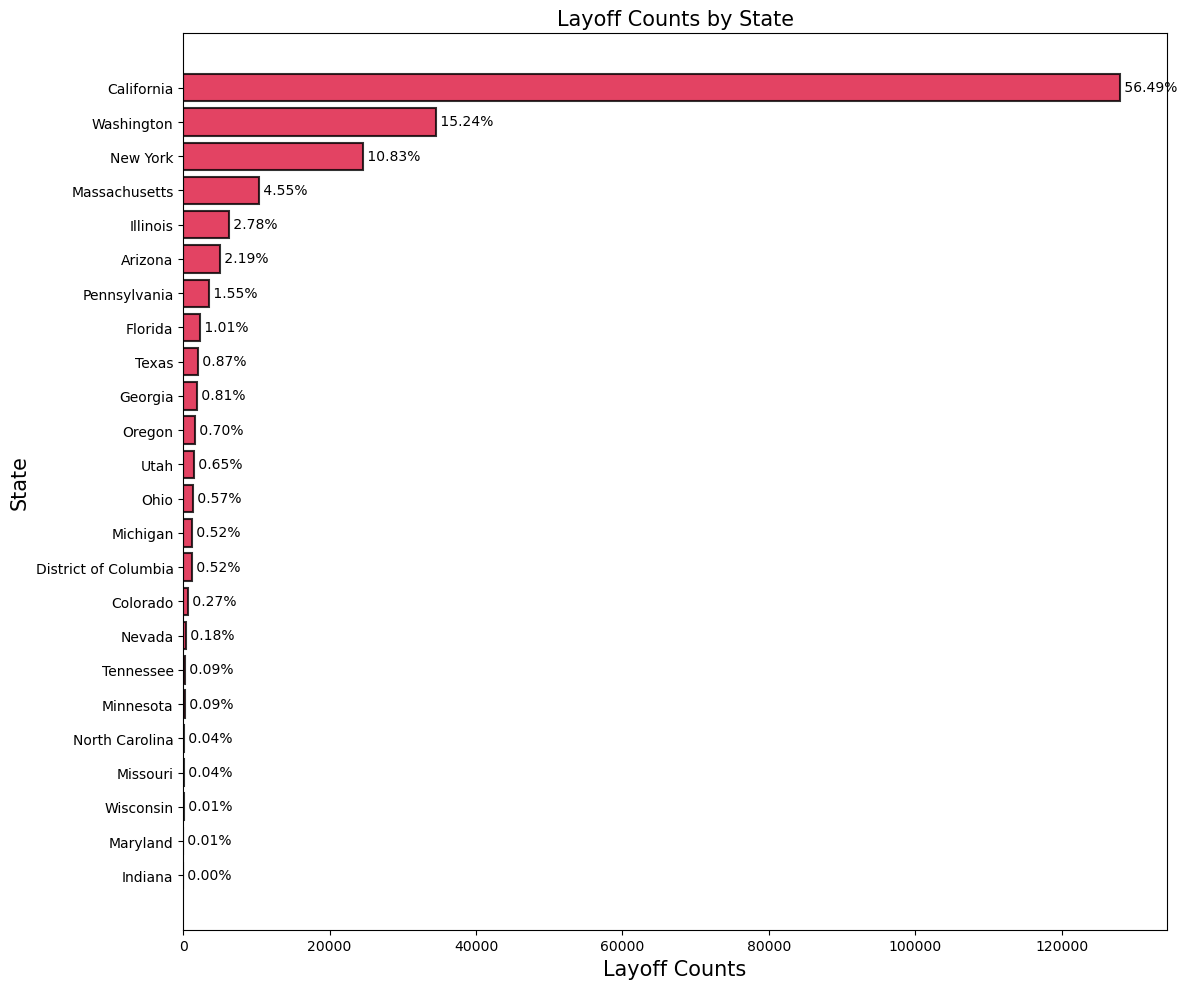

In [62]:
#create DF to display group by states and sum up the lay off count
groupDataStates = pd.DataFrame(cleaned_mergedData.groupby(["state_name"]).sum()["Laid_Off_Count"])

#sort DF in descending order
groupDataSortedStates = groupDataStates.sort_values("Laid_Off_Count", ascending = True)

#create a column to display the percentage of the total for each state
groupDataSortedStates["Percentage"] = round(groupDataSortedStates["Laid_Off_Count"]/groupDataSortedStates["Laid_Off_Count"].sum()*100, 3)

#reset the index
groupDataSortedStatesIndex= groupDataSortedStates.reset_index()

# displays DF
groupDataSortedStatesIndex

fig, ax = plt.subplots(figsize=(12, 10))

# Create horizontal bars
ax.barh(groupDataSortedStatesIndex['state_name'], groupDataSortedStatesIndex['Laid_Off_Count'], color='green', alpha=0.8, edgecolor='black', linewidth=1.5,)

# Add percentage labels
for i, v in enumerate(groupDataSortedStatesIndex['Percentage']):
    ax.annotate(f" {v:.2f}%", xy=(groupDataSortedStatesIndex['Laid_Off_Count'][i] + 5, i - 0.1), fontsize=10)

# Set the chart title and axis labels
ax.set_title('Layoff Counts by State', fontsize=15)
ax.set_xlabel('Layoff Counts',fontsize=15)
ax.set_ylabel('State',fontsize=15)

fig2 = plt.gcf()
fig2.savefig('Bar Plot States.png') 
plt.tight_layout()

plt.show()

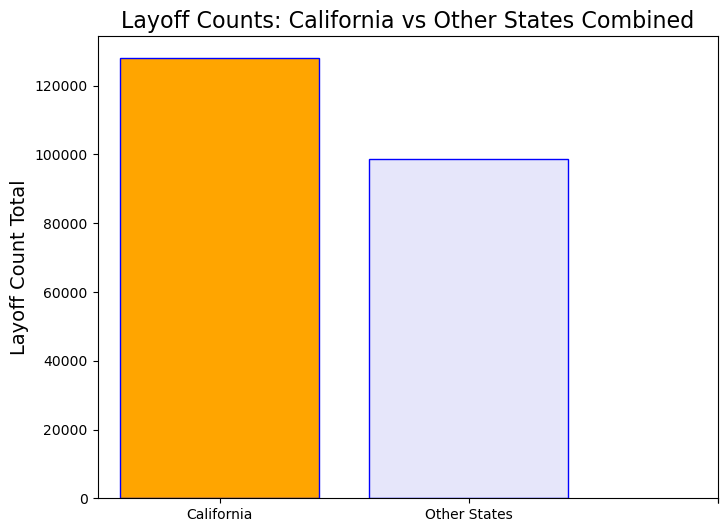

In [63]:
# get total layoff counts by state
groupDataStates = pd.DataFrame(cleaned_mergedData.groupby(["state_name"]).sum()["Laid_Off_Count"]).reset_index()

# filter data to get only California and other states
ca_data = groupDataStates[groupDataStates["state_name"] == "California"]
other_data = groupDataStates[groupDataStates["state_name"] != "California"]

# get total layoff counts for other states combined and put the "states_name" column from other date into a variable named "other states" so it can be plotted 
other_counts = other_data["Laid_Off_Count"].sum()

# plot the bar chart
plt.figure(figsize=(8, 6))

# plot the bar for California
plt.bar(x="California", height=ca_data["Laid_Off_Count"], color="orange", edgecolor="blue")

# plot the bar for "other states"
plt.bar(x="Other States", height=other_counts, color="lavender", edgecolor="blue")

# set chart title and axis labels
plt.title("Layoff Counts: California vs Other States Combined", fontsize=16)
plt.ylabel("Layoff Count Total", fontsize=14)

# set x-axis tick labels
plt.xticks(["California", "Other States"])

# add legend
plt.legend()

# add text to center of each bar
ca_text = f"{round(ca_data['Laid_Off_Count'].values[0]):,}"
plt.text(x=0, y=ca_data["Laid_Off_Count"]/2, s=ca_text, ha="center", va="center", color="blue", fontsize=14, fontweight="bold")

other_text = f"{other_counts:,}"
plt.text(x=1, y=other_counts/2, s=other_text, ha="center", va="center", color="orange", fontsize=13, fontweight="bold")

#save graph
fig1 = plt.gcf()
fig1.savefig('California Vs Other States.png') 

# show the plot
plt.show()

# Per Cities

In [64]:
#create separated DFs to group by Location HQ but keep the latitude and longitude data as original
mapPlotGroup = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]).sum()["Laid_Off_Count"])
mapPlotlat = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]).max()["lat"]) 
mapPlotlng = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]).max()["lng"])

#create a column to display the percentage of the total for each city
mapPlotGroup["% of Total Layoffs"] = (mapPlotGroup["Laid_Off_Count"]/mapPlotGroup["Laid_Off_Count"].sum())*100

#format the column percentage to 2 decimal place
mapPlotGroup["% of Total Layoffs"] = mapPlotGroup["% of Total Layoffs"].map('{:.2f}'.format)


#add the 2 DFs for latitude and longitude into the Lay Off Count DF
mapPlotGroup["lat"] = mapPlotlat["lat"]
mapPlotGroup["lng"] = mapPlotlng["lng"]

#sort the DF by Lay Off Count descending
mapPlotGroupSorted = mapPlotGroup.sort_values("Laid_Off_Count", ascending = False)

#reset Index
mapPlotGroupSortedIndex= mapPlotGroupSorted.reset_index()

#display the DF
mapPlotGroupSortedIndex

,Location_HQ,Laid_Off_Count,% of Total Layoffs,lat,lng
0,San Francisco,120061.0,53.00,37.7562,-122.4430
1,Seattle,34526.0,15.24,47.6211,-122.3244
2,New York,24544.0,10.83,40.6943,-73.9249
3,Boston,10299.0,4.55,42.3188,-71.0846
4,Chicago,6289.0,2.78,41.8373,-87.6862
5,Los Angeles,6014.0,2.65,34.1139,-118.4068
6,Phoenix,4954.0,2.19,33.5722,-112.0891
7,Philadelphia,2989.0,1.32,40.0077,-75.1339
8,Miami,2261.0,1.00,25.7839,-80.2102
9,San Diego,1843.0,0.81,32.8312,-117.1225


In [65]:
#create a map plot for the bottom 31 cities
mapPlotGroupLast = mapPlotGroupSortedIndex.iloc[3:34,:]
plot1 = mapPlotGroupLast.hvplot.points('lng', 'lat', geo=True, color='Location_HQ', alpha=0.4,frame_width=1000, 
                               frame_height=1000,size ="Laid_Off_Count",hover_cols = ["Location_HQ","Laid_Off_Count"],
                               xlim=(-125, -60), ylim=(0, 45), tiles='OSM')
#display the map
plot1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Location_HQ,Laid_Off_Count)

In [66]:
#save the plot
hvplot.save(plot1, "bottom_cities.png",fmt= "png")

In [67]:
#create a map plot for the top 3 cities
mapPlotGroupTop3 = mapPlotGroupSortedIndex.iloc[0:3,:]
plot2 = mapPlotGroupTop3.hvplot.points('lng', 'lat', geo=True, color='Location_HQ', alpha=0.5,frame_width=1000,
                               frame_height=1000,size ="Laid_Off_Count",hover_cols = ["Location_HQ","Laid_Off_Count"],
                               xlim=(-150, -50), ylim=(0, 45), tiles='OSM')

#display the map
plot2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (Location_HQ,Laid_Off_Count)

In [68]:
#save the plot
hvplot.save(plot2, "top_cities.png",fmt= "png")

In [69]:
Location_HQ = cleaned_mergedData.groupby("state_name").sum()
Location_HQ

,Laid_Off_Count,Funds_Raised,lat,lng
state_name,,,,
Arizona,4954.0,4569.0,167.8610,-560.4455
California,127983.0,830422.5,17221.1108,-56319.5907
Colorado,602.0,3570.8,357.8589,-943.8831
District of Columbia,1169.0,2468.0,427.9517,-847.1793
Florida,2285.0,4889.0,183.1806,-562.5981
Georgia,1827.0,3046.0,337.6270,-844.2240
Illinois,6289.0,8059.8,1045.9325,-2192.1550
Indiana,5.0,11.0,39.7771,-86.1458
Maryland,20.0,5.0,39.3051,-76.6144


In [70]:
groupDataStates = pd.DataFrame(cleaned_mergedData.groupby(["state_name"]).sum()["Laid_Off_Count"])
groupDataSortedStates = groupDataStates.sort_values("Laid_Off_Count", ascending = False)
groupDataSortedStates 

,Laid_Off_Count
state_name,
California,127983.0
Washington,34526.0
New York,24544.0
Massachusetts,10299.0
Illinois,6289.0
Arizona,4954.0
Pennsylvania,3502.0
Florida,2285.0
Texas,1966.0


In [71]:
states = groupDataSortedStates.index
states

Index(['California', 'Washington', 'New York', 'Massachusetts', 'Illinois',
       'Arizona', 'Pennsylvania', 'Florida', 'Texas', 'Georgia', 'Oregon',
       'Utah', 'Ohio', 'Michigan', 'District of Columbia', 'Colorado',
       'Nevada', 'Tennessee', 'Minnesota', 'North Carolina', 'Missouri',
       'Wisconsin', 'Maryland', 'Indiana'],
      dtype='object', name='state_name')

In [72]:
groupDataCity = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]).sum()["Laid_Off_Count"])
groupDataSortedCity = groupDataCity.sort_values("Laid_Off_Count", ascending = False)
groupDataSortedCity

,Laid_Off_Count
Location_HQ,
San Francisco,120061.0
Seattle,34526.0
New York,24544.0
Boston,10299.0
Chicago,6289.0
Los Angeles,6014.0
Phoenix,4954.0
Philadelphia,2989.0
Miami,2261.0


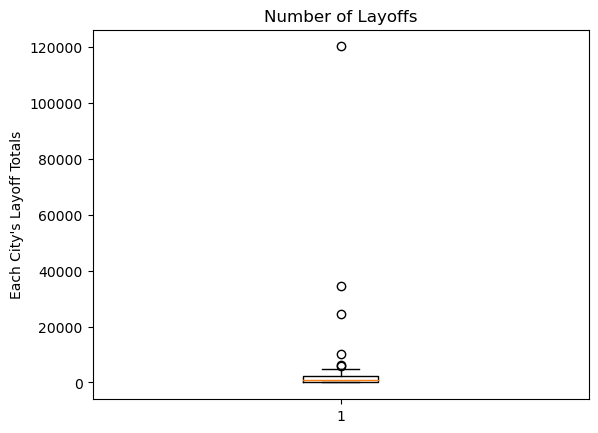

In [73]:
cityLayoffs = groupDataSortedCity
fig1, ax1 = plt.subplots()
ax1.set_title("Number of Layoffs")
ax1.set_ylabel("Each City's Layoff Totals")
ax1.boxplot(cityLayoffs)

#save
fig3 = plt.gcf()
fig3.savefig('Box Plot with outliers.png', bbox_inches='tight')

plt.show()

In [74]:
cityArray = groupDataSortedCity.to_numpy()
cityArray.flatten()

array([1.20061e+05, 3.45260e+04, 2.45440e+04, 1.02990e+04, 6.28900e+03,
       6.01400e+03, 4.95400e+03, 2.98900e+03, 2.26100e+03, 1.84300e+03,
       1.82700e+03, 1.73900e+03, 1.58100e+03, 1.47800e+03, 1.19500e+03,
       1.18000e+03, 1.16900e+03, 6.02000e+02, 5.13000e+02, 4.05000e+02,
       2.14000e+02, 2.07000e+02, 1.86000e+02, 1.06000e+02, 6.50000e+01,
       6.50000e+01, 4.50000e+01, 4.40000e+01, 4.10000e+01, 3.50000e+01,
       2.40000e+01, 2.00000e+01, 2.00000e+01, 5.00000e+00])

In [75]:
cityArray.shape

(34, 1)

In [76]:
quartiles = np.quantile(cityArray,[.25,.5,.75])
quartiles

array([  65. ,  885.5, 2156.5])

In [77]:
quartiles = np.quantile(cityArray,[.25,.5,.75])
quartiles
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[1]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = np.sort(cityArray[cityArray > upper_bound])
outlier_list = outliers.tolist()
print(outlier_list)

no_outliers = np.sort(cityArray[cityArray < upper_bound])
no_outlier_list = no_outliers.tolist()
print(no_outlier_list)

The lower quartile of temperatures is: 65.0
The upper quartile of temperatures is: 2156.5
The interquartile range of temperatures is: 2091.5
The the median of temperatures is: 885.5 
Values below -3072.25 could be outliers.
Values above 5293.75 could be outliers.
[6014.0, 6289.0, 10299.0, 24544.0, 34526.0, 120061.0]
[5.0, 20.0, 20.0, 24.0, 35.0, 41.0, 44.0, 45.0, 65.0, 65.0, 106.0, 186.0, 207.0, 214.0, 405.0, 513.0, 602.0, 1169.0, 1180.0, 1195.0, 1478.0, 1581.0, 1739.0, 1827.0, 1843.0, 2261.0, 2989.0, 4954.0]


In [78]:
CityName = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]))[0]
CityName_List = CityName.tolist()

In [79]:
City_Lat = cleaned_mergedData.groupby("Location_HQ")["lat"].min()
City_Lat_List = City_Lat.tolist()

City_Layoff = pd.DataFrame(cleaned_mergedData.groupby(["Location_HQ"]).sum()["Laid_Off_Count"])
City_Layoff_List = City_Layoff.to_numpy().flatten().tolist()


CityLatLayoff = pd.DataFrame(list(zip(CityName_List, City_Lat_List, City_Layoff_List)),
               columns =['City_Name', 'Latitude', 'Layoff_Count'])
Ascending = CityLatLayoff.sort_values("Layoff_Count", ascending = False)
resetAscending = Ascending.reset_index(drop=True)
resetAscending

,City_Name,Latitude,Layoff_Count
0,San Francisco,37.7562,120061.0
1,Seattle,47.6211,34526.0
2,New York,40.6943,24544.0
3,Boston,42.3188,10299.0
4,Chicago,41.8373,6289.0
5,Los Angeles,34.1139,6014.0
6,Phoenix,33.5722,4954.0
7,Philadelphia,40.0077,2989.0
8,Miami,25.7839,2261.0
9,San Diego,32.8312,1843.0


The r-squared is: 0.013914707013238992


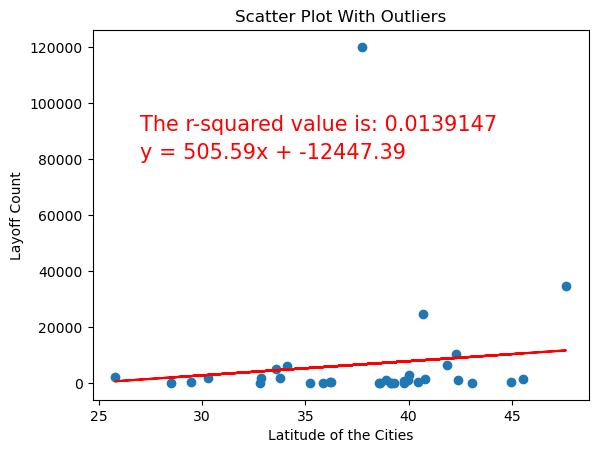

In [80]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(CityLatLayoff.Latitude, CityLatLayoff.Layoff_Count)
regress_values = CityLatLayoff.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsq = "The r-squared value is: " + str(round(rvalue**2,7))
plt.scatter(CityLatLayoff.Latitude, CityLatLayoff.Layoff_Count)
plt.plot(CityLatLayoff.Latitude,regress_values,"r-")
plt.annotate(line_eq,(27,80000),fontsize=15,color="red")
plt.annotate(rsq,(27,90000),fontsize=15,color="red")
plt.xlabel('Latitude of the Cities')
plt.title('Scatter Plot With Outliers')
plt.ylabel('Layoff Count')
print(f"The r-squared is: {rvalue**2}")

fig1 = plt.gcf()
plt.show()
fig1.savefig('Scatter Plot with outliers.png', bbox_inches='tight')

In [81]:
df_filtered = CityLatLayoff[CityLatLayoff['Layoff_Count'] <= upper_bound]
df_filtered

,City_Name,Latitude,Layoff_Count
0,Atlanta,33.7627,1827.0
1,Austin,30.3004,1739.0
2,Baltimore,39.3051,20.0
4,Charlotte,35.2080,44.0
6,Cincinnati,39.1413,106.0
7,Columbus,39.9862,1195.0
8,Dallas,32.7936,41.0
9,Denver,39.7621,602.0
10,Detroit,42.3834,1180.0
11,Indianapolis,39.7771,5.0


The r-squared is: 0.03398901474508632


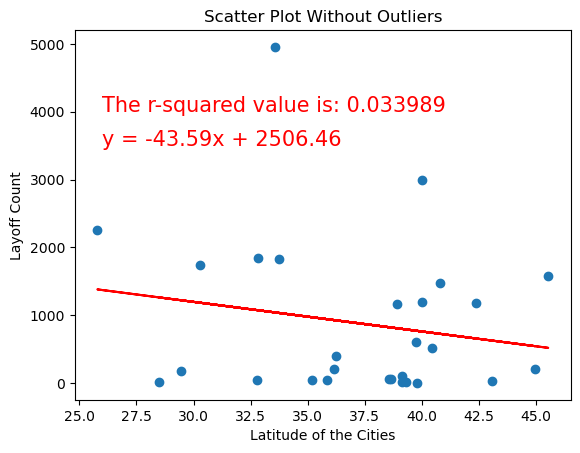

In [82]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_filtered.Latitude, df_filtered.Layoff_Count)
regress_values = df_filtered.Latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rsq = "The r-squared value is: " + str(round(rvalue**2,7))
plt.scatter(df_filtered.Latitude, df_filtered.Layoff_Count)
plt.plot(df_filtered.Latitude,regress_values,"r-")
plt.annotate(line_eq,(26,3500),fontsize=15,color="red")
plt.annotate(rsq,(26,4000),fontsize=15,color="red")
plt.xlabel('Latitude of the Cities')
plt.title('Scatter Plot Without Outliers')
plt.ylabel('Layoff Count')
print(f"The r-squared is: {rvalue**2}")


fig2 = plt.gcf()
plt.show()
fig2.savefig('Scatter Plot without outliers.png', bbox_inches='tight')

## Question 3: Do companies have more layoffs pre-IPO or post-IPO?
#### Team Members: Julie Tang, Sam Gantman

## Question 4: Does the amount of funds raised impact the layoff rates?
#### Team Members: Taylor Gibson, Arthi Ranganathan